
# Laboratorio-2-Series-de-Tiempo

Raul Angel Jimenez 19017

Donaldo Garcia 19683

Bryann Alfaro 19372

Oscar Saravia 19322 

link al repo: https://github.com/raulangelj/Laboratorio-2-Series-de-Tiempo

Importar librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from prophet import Prophet
from joblib import Parallel
from multiprocessing import cpu_count
from joblib import delayed

ModuleNotFoundError: No module named 'pandas_profiling'

Analisis exploratorio

In [ ]:
#Cargar dataframe y obtener primeros valores para conocimiento de datos
dataframe = pd.read_csv('datos.csv', encoding='latin-1',engine='python',header=0)

print(dataframe.head())
print(dataframe.shape)


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294  Ãland
1  1743-12-01                 NaN                            NaN  Ãland
2  1744-01-01                 NaN                            NaN  Ãland
3  1744-02-01                 NaN                            NaN  Ãland
4  1744-03-01                 NaN                            NaN  Ãland
(577462, 4)


In [ ]:
#Separando por mes para observar comportamiento
print(dataframe.head())
dataframe['Mes'] = dataframe['dt'].str.split('-').str[1]
dataframe.dropna(inplace=True)
dataframe_test_month = dataframe.groupby('Mes').mean()
print(dataframe_test_month.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294  Ãland
1  1743-12-01                 NaN                            NaN  Ãland
2  1744-01-01                 NaN                            NaN  Ãland
3  1744-02-01                 NaN                            NaN  Ãland
4  1744-03-01                 NaN                            NaN  Ãland
     AverageTemperature  AverageTemperatureUncertainty
Mes                                                   
01            11.635348                       1.213884
02            12.577014                       1.143835
03            14.574245                       1.031751
04            16.969519                       1.009302
05            19.523826                       0.946852


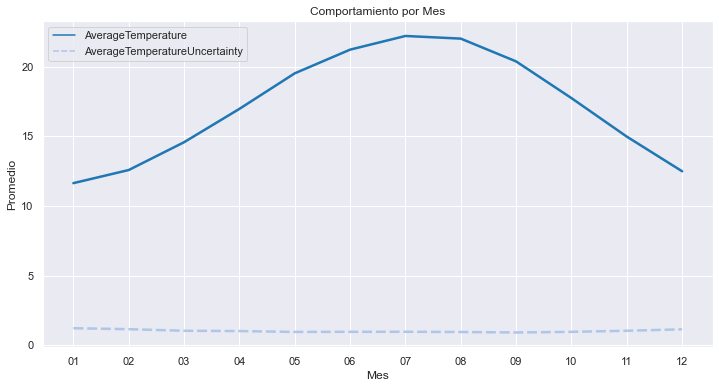

In [ ]:
#Graficar comportamiento por mes
plt.figure(figsize=(12,6))
sns.lineplot(data=dataframe_test_month, palette="tab20", linewidth=2.5)
plt.title('Comportamiento por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.show()

In [ ]:
#Separando por año para observar comportamiento
print(dataframe.head())
dataframe['Año'] = dataframe['dt'].str.split('-').str[0]
dataframe.dropna(inplace=True)
dataframe_test_year = dataframe.groupby('Año').mean()
print(dataframe_test_year.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country Mes
0  1743-11-01               4.384                          2.294  Ãland  11
5  1744-04-01               1.530                          4.680  Ãland  04
6  1744-05-01               6.702                          1.789  Ãland  05
7  1744-06-01              11.609                          1.577  Ãland  06
8  1744-07-01              15.342                          1.410  Ãland  07
      AverageTemperature  AverageTemperatureUncertainty
Año                                                    
1743            5.184140                       2.183520
1744            9.837898                       2.136302
1745            1.387125                       1.960590
1750            9.129353                       2.103795
1751            9.167388                       2.053218


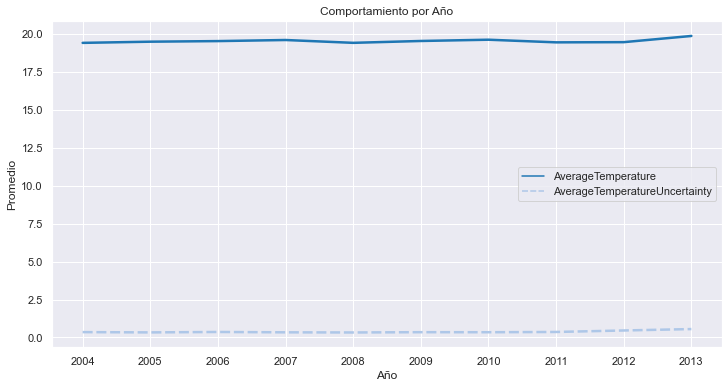

In [ ]:
#Graficar comportamiento por año
plt.figure(figsize=(12,6))
data = dataframe_test_year.tail(10)
sns.lineplot(data=data, palette="tab20", linewidth=2.5)
plt.title('Comportamiento por Año')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.show()

In [ ]:
df_clean = pd.DataFrame()
#Get average temperatura by date and store in dataframe
dataframe.set_index('dt', inplace=True)
dataframe.index = pd.to_datetime(dataframe.index)
df_clean = dataframe.groupby('dt').mean()
df_clean.dropna(inplace=True)
print(df_clean.head())
print(df_clean.shape)


            AverageTemperature  AverageTemperatureUncertainty
dt                                                           
1743-11-01             5.18414                        2.18352
1744-04-01             8.66148                        2.80144
1744-05-01            11.09836                        1.99444
1744-06-01            14.92772                        2.02006
1744-07-01            17.09430                        2.02156
(3167, 2)


Profiler report

In [ ]:
#Correr para generar reporte
profile = ProfileReport(df_clean)
profile

Outlier Analysis - Boxplot


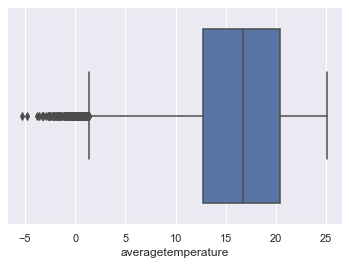

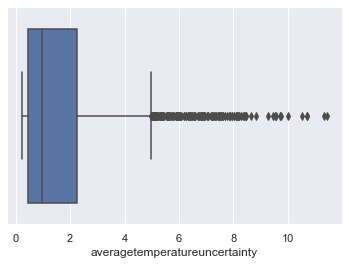

Distribution Analysis - Histogram


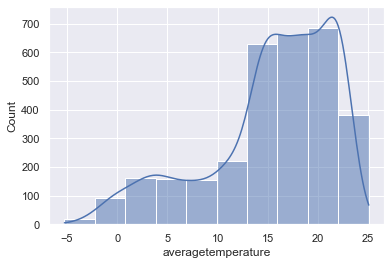

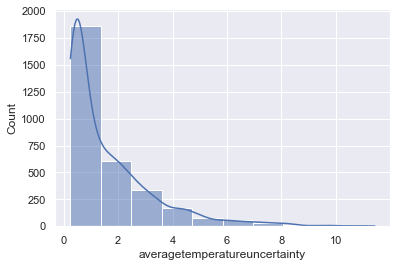

In [ ]:
#Estandarizar nombres
df_clean = clean(df_clean,method="standardize")
#Analisis de numericas 
eda_num(df_clean)

Serie Univariante

<AxesSubplot:xlabel='dt'>

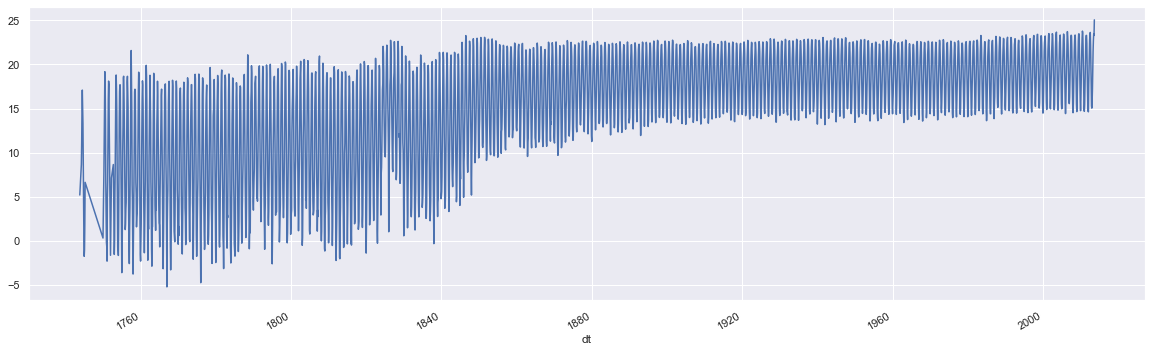

In [ ]:
#Grafica completa 
df_clean['averagetemperature'].plot(figsize=(20,6))

            averagetemperature  averagetemperatureuncertainty
dt                                                           
1880-02-01           13.221928                       0.893694
1880-03-01           15.464446                       1.072905
1880-04-01           17.580547                       0.925915
1880-05-01           19.796484                       0.984502
1880-06-01           21.475518                       0.939591
            averagetemperature  averagetemperatureuncertainty
dt                                                           
2013-05-01           21.478050                       0.479277
2013-06-01           22.744508                       0.520273
2013-07-01           23.471711                       0.533153
2013-08-01           23.297855                       0.591050
2013-09-01           25.065095                       1.195619


<AxesSubplot:xlabel='dt'>

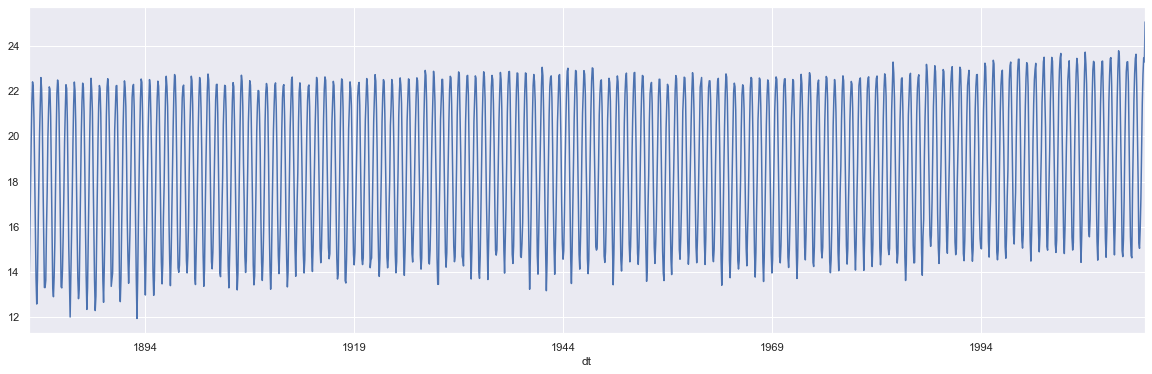

In [ ]:
#Ploteando la serie para analisis posterior
import datetime
df_clean = df_clean[(df_clean.index > "1880-01-01") & (df_clean.index < "2014-01-01")]
print(df_clean.head())
print(df_clean.tail())
df_clean['averagetemperature'].plot(figsize=(20,6))

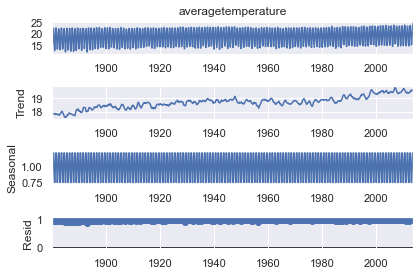

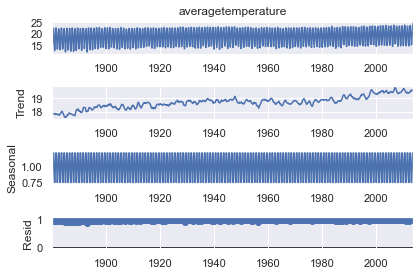

In [ ]:
#Analisis de los componentes
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_clean['averagetemperature'],period=12,model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()



<AxesSubplot:xlabel='dt'>

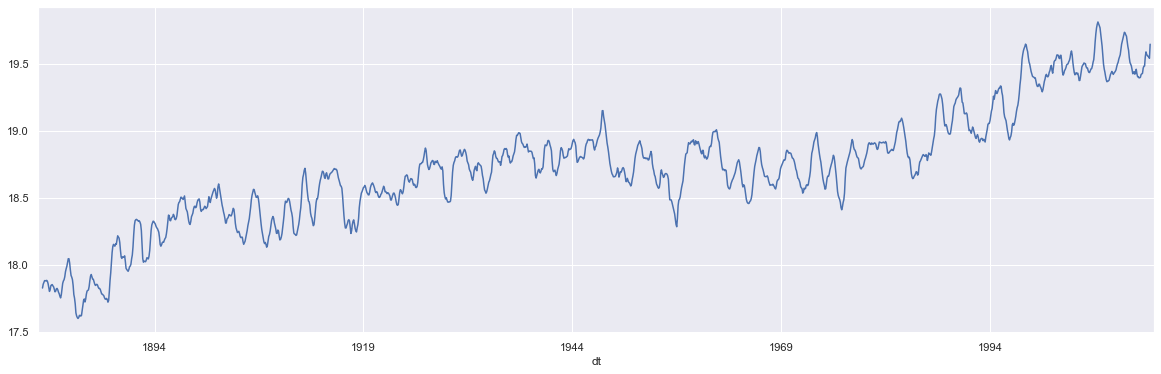

In [ ]:
#Ploteando el trend
trend.plot(figsize=(20,6))

<AxesSubplot:xlabel='dt'>

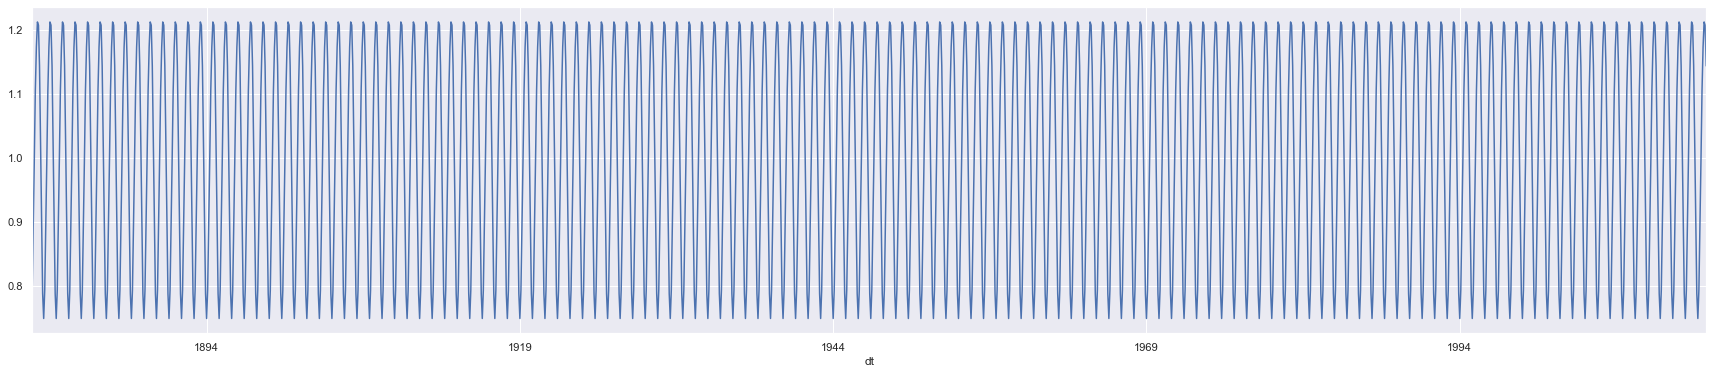

In [ ]:
#Ploteando seasonal
seasonal.plot(figsize=(30,6))

<AxesSubplot:xlabel='dt'>

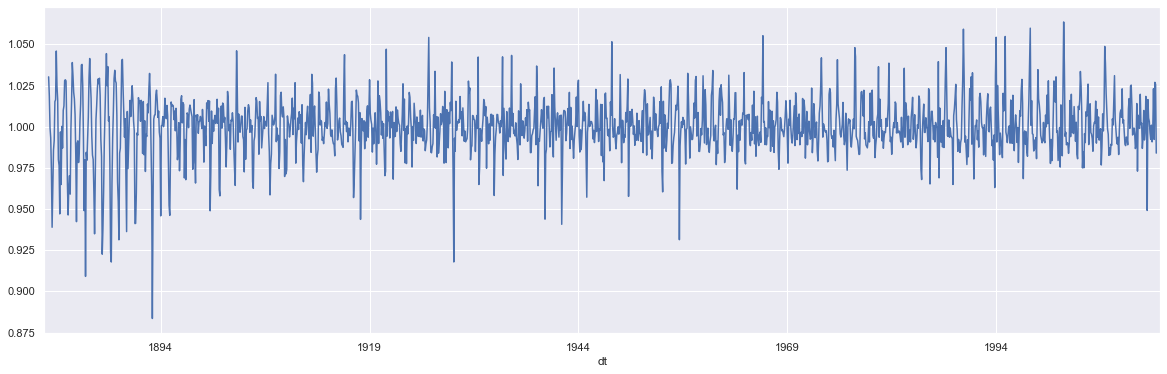

In [ ]:
#Ploteando residual
residual.plot(figsize=(20,6))

In [ ]:
#Test de dicky fuller
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_clean['averagetemperature'])
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
     print("\t",key, ": ", val) 

1. ADF :  -1.159312904699279
2. P-Value :  0.6908489666911215
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1578
5. Critical Values :
	 1% :  -3.4345008044458614
	 5% :  -2.8633733328409368
	 10% :  -2.56774603301736


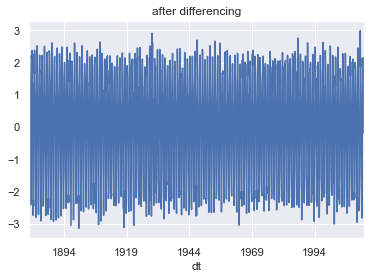

In [ ]:
#Diferenciacion para reducir estacionariedad en media
data_diff = df_clean - df_clean.shift()
data_diff.dropna(inplace=True)
data_diff['averagetemperature'].plot(title='after differencing');


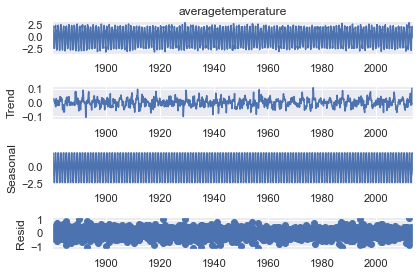

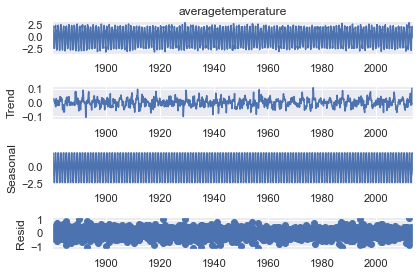

In [ ]:
#Descomposicion luego del ajuste
decomposition = seasonal_decompose(data_diff['averagetemperature'],period=12,model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()

In [ ]:
test = adfuller(data_diff.dropna()["averagetemperature"])
print("p-value :", test[1])

p-value : 2.3629021311194675e-23


## SARIMA

<AxesSubplot:xlabel='dt'>

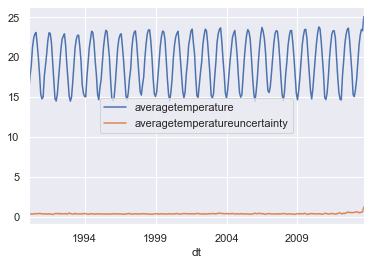

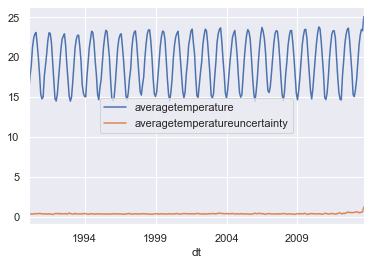

In [ ]:
#load the data
data = df_clean[(df_clean.index > "1990-01-01") & (df_clean.index < "2014-01-01")]
#divide into train and validation set
train = valid = data
#plotting the data
train.plot()
valid.plot()

In [ ]:
from pmdarima import auto_arima  
import warnings

warnings.filterwarnings("ignore")
  
stepwise_fit = auto_arima(data['averagetemperature'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=330.838, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=239.640, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=196.578, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=329.390, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=320.565, Time=0.07 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=195.756, Time=0.58 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=249.995, Time=0.28 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=197.207, Time=1.67 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=197.107, Time=2.79 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=195.432, Time=1.53 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=212.689, Time=1.01 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=189.901, Time=2.94 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=192.712, Time=3.50 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  284
Model:             SARIMAX(3, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -82.720
Date:                                 Thu, 04 Aug 2022   AIC                            179.440
Time:                                         20:34:27   BIC                            204.680
Sample:                                              0   HQIC                           189.573
                                                 - 284                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0114      0.005      2.345      0.019       0.002       0.021
ar.L1          0.2496      0.085      2.930      0.003       0.083       0.416
ar.L2          0.1130      0.090      1.255      0.210      -0.064       0.289
ar.L3          0.2091      0.089      2.342      0.019       0.034       0.384
ma.S.L12      -0.9717      0.096    -10.111      0.000      -1.160      -0.783
ma.S.L24       0.1276      0.099      1.293      0.196      -0.066       0.321
sigma2         0.1011      0.003     31.369      0.000       0.095       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7583.23
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             2.63
Prob(H) (two-sided):                  0.01   Kurtosis:                        28.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:]
  
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['averagetemperature'], 
                order = (3, 0, 0), 
                seasonal_order =(0, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   averagetemperature   No. Observations:                  272
Model:             SARIMAX(3, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -37.391
Date:                              Thu, 04 Aug 2022   AIC                             84.782
Time:                                      20:34:28   BIC                            102.585
Sample:                                  02-01-1990   HQIC                            91.939
                                       - 09-01-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2978      0.056      5.319      0.000       0.188       0.408
ar.L2          0.1460      0.061      2.409      0.016       0.027       0.265
ar.L3          0.2485      0.061      4.042      0.000       0.128       0.369
ma.S.L12      -0.8767      0.056    -15.617      0.000      -0.987      -0.767
sigma2         0.0729      0.005     13.319      0.000       0.062       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                15.89
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.24
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='dt'>

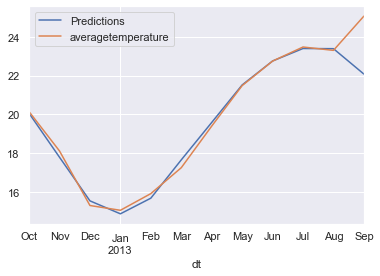

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
predictions.plot(legend = True)
test['averagetemperature'].plot(legend = True)

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
print(rmse(test["averagetemperature"], predictions))
  
print(mean_squared_error(test["averagetemperature"], predictions))

0.8856490573632485
0.7843742528084107


<AxesSubplot:xlabel='dt'>

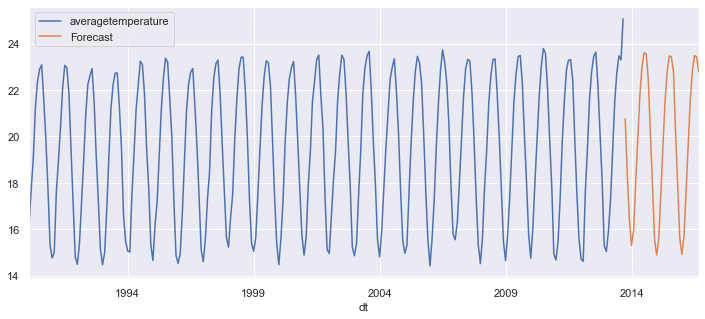

In [ ]:
model = SARIMAX(data['averagetemperature'], 
                        order = (3, 0, 0), 
                        seasonal_order =(0, 1, 2, 12))
result = model.fit()
  
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
data['averagetemperature'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

<AxesSubplot:xlabel='dt'>

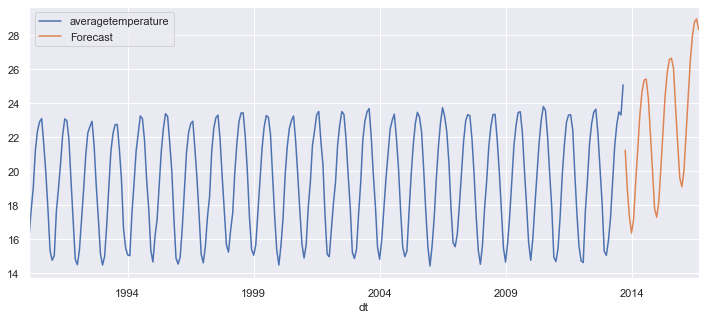

In [ ]:
model = SARIMAX(data['averagetemperature'], 
                        order = (3, 3, 3), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
data['averagetemperature'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

<AxesSubplot:xlabel='dt'>

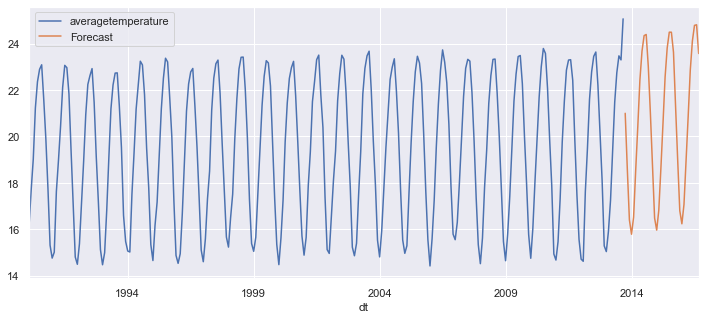

In [ ]:
model = SARIMAX(data['averagetemperature'], 
                        order = (2,2,2), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
data['averagetemperature'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

<AxesSubplot:xlabel='dt'>

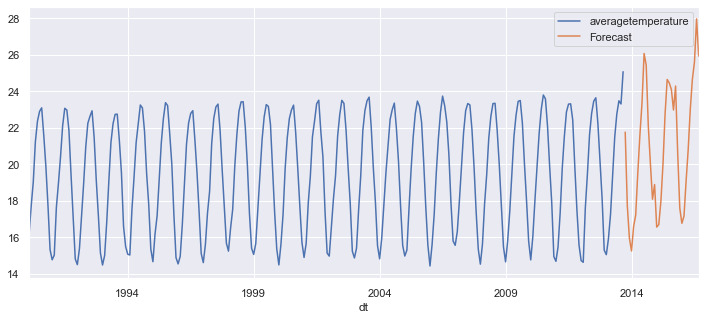

In [ ]:
model = SARIMAX(data['averagetemperature'], 
                        order = (2,2,2), 
                        seasonal_order =(2, 1, 1, 5))
result = model.fit()
  
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
data['averagetemperature'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## Prophet

In [ ]:
data

,averagetemperature,averagetemperatureuncertainty
dt,,
1990-02-01,16.176492,0.329107
1990-03-01,17.695236,0.379421
1990-04-01,19.026107,0.308463
1990-05-01,21.225950,0.307740
1990-06-01,22.355921,0.357764
...,...,...
2013-05-01,21.478050,0.479277
2013-06-01,22.744508,0.520273
2013-07-01,23.471711,0.533153


In [ ]:
data_prophet = data.copy()
data_prophet = data_prophet.drop(['averagetemperatureuncertainty'], axis=1)

In [ ]:
data_prophet.dtypes

averagetemperature    float64
dtype: object

In [ ]:
data_prophet

,y
dt,
1990-02-01,16.176492
1990-03-01,17.695236
1990-04-01,19.026107
1990-05-01,21.225950
1990-06-01,22.355921
...,...
2013-05-01,21.478050
2013-06-01,22.744508
2013-07-01,23.471711


In [ ]:
# change the name of column averagetemperature to y
data_prophet = data_prophet.rename(columns={"averagetemperature": "y", "dt": "ds"})
# change dt from index to a column
data_prophet['ds'] = data_prophet.index
# remove the index
data_prophet = data_prophet.reset_index(drop=True)

# change the name of colum dt to ds
data_prophet

,y,ds
0,16.176492,1990-02-01
1,17.695236,1990-03-01
2,19.026107,1990-04-01
3,21.225950,1990-05-01
4,22.355921,1990-06-01
...,...,...
279,21.478050,2013-05-01
280,22.744508,2013-06-01
281,23.471711,2013-07-01
282,23.297855,2013-08-01


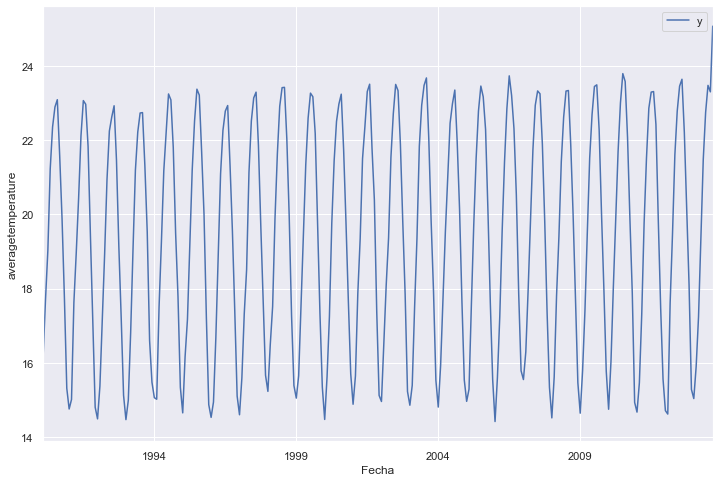

In [ ]:
# visuaizacion de datos
ax = data_prophet.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('averagetemperature')
ax.set_xlabel('Fecha')

plt.show()

In [ ]:
# fijar el intervalo de incertidumbre en 95% (el default de Prophet es 80%)
mi_modelo = Prophet(interval_width = 0.95)
mi_modelo.fit(data_prophet)
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

20:49:36 - cmdstanpy - INFO - Chain [1] start processing
20:49:36 - cmdstanpy - INFO - Chain [1] done processing


,ds
315,2016-05-01
316,2016-06-01
317,2016-07-01
318,2016-08-01
319,2016-09-01


In [ ]:
prediccion = mi_modelo.predict(fechas_futuras)

In [ ]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
315,2016-05-01,21.714865,21.101398,22.356470
316,2016-06-01,22.907556,22.355330,23.588300
317,2016-07-01,23.490179,22.848026,24.077199
318,2016-08-01,23.579304,22.976016,24.199790
319,2016-09-01,22.282758,21.658417,22.872762


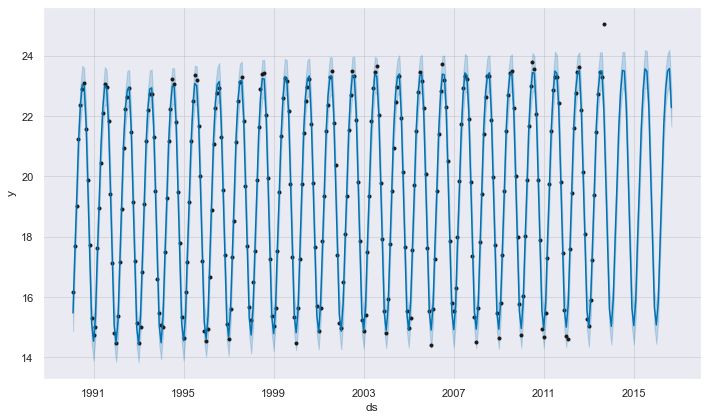

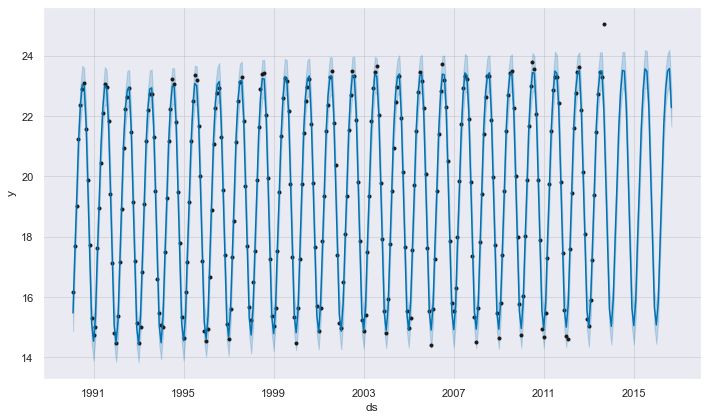

In [ ]:
mi_modelo.plot(prediccion,
               uncertainty=True)

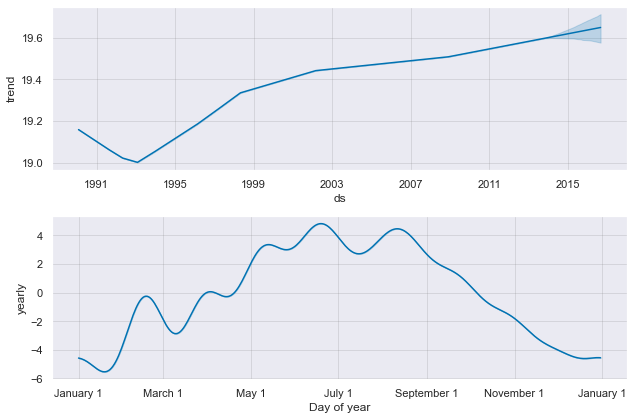

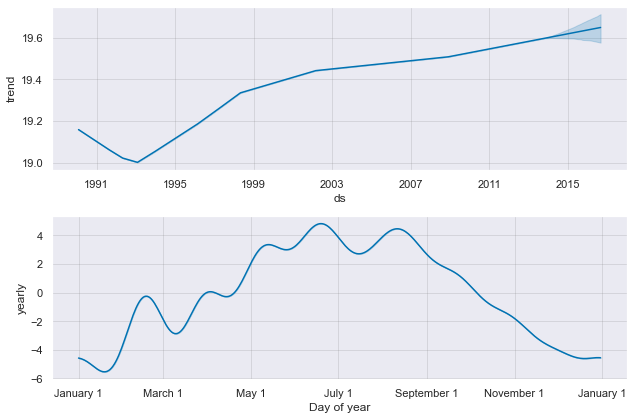

In [ ]:
mi_modelo.plot_components(prediccion)

### 3. Haga una predicción de los valores de la serie para los últimos 3 años. Explique qué tan buena es su predicción.

In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(df_clean)
temp_s1 = df_clean.copy()
temp_s1 = temp_s1.loc[temp_s1["ds"].between('2011-01-1', '2013-12-31')]
temp_s1

In [ ]:
prediccion = model.predict(temp_s1)
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

### 4. Haga una predicción, tres años al futuro, usando los años anteriores y determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

In [ ]:
model2 = Prophet(interval_width = 0.95)
model2.fit(temp_s1)

In [ ]:
fechas_adelantadas = model2.make_future_dataframe(periods=36, freq='MS')
fechas_adelantadas.tail()

In [ ]:
prediccion = model2.predict(fechas_futuras)
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model2.plot(prediccion,
               uncertainty=True);

In [ ]:
model2.plot_components(prediccion)

### 5. Basado en los resultados obtenidos, diría Ud que hay evidencia para corroborar la tan discutida aseveración de que el Cambio Climático y el Calentamiento Global es real